# **Vehicle dataset**

This dataset contains information about used cars.
This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.
The columns in the given dataset are as follows:

name
year
selling_price
km_driven
fuel
seller_type
transmission
Owner

**Importing the dependencies**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

DATA COLLECTION & PRE-PROCESSING

In [3]:
df=pd.read_csv("/content/car data.csv")
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
df.shape

(301, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [9]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [13]:
print("Fuel_Type:",df.Fuel_Type.value_counts())
print("Seller_type:",df.Seller_Type.value_counts())
print("Transmission:",df.Transmission.value_counts())


Fuel_Type: Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Seller_type: Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Transmission: Manual       261
Automatic     40
Name: Transmission, dtype: int64


Encode the categorical data

In [19]:
df.replace({"Fuel_Type":{"Petrol":0,"Diesel":1,"CNG":2}},inplace=True)
df.replace({"Seller_Type":{"Dealer":0,"Individual":1}},inplace=True)
df.replace({"Transmission":{"Manual":0,"Automatic":1}},inplace=True)

In [20]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0
297,brio,2015,4.00,5.90,60000,0,0,0,0
298,city,2009,3.35,11.00,87934,0,0,0,0
299,city,2017,11.50,12.50,9000,1,0,0,0


Splitting the data into Training and test data

In [21]:
X=df.drop(["Car_Name","Selling_Price"],axis=1)
Y=df["Selling_Price"]

In [22]:
X

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [23]:
Y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

Splitting the Training and test data

In [25]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=2)


Model Training- Linear Regression

In [27]:
linear_regression_model=LinearRegression()


In [28]:
linear_regression_model.fit(X_train,Y_train)

LinearRegression()

Model Evaluation

In [29]:
training_data_prediction=linear_regression_model.predict(X_train)

In [31]:
error_score=metrics.r2_score(Y_train,training_data_prediction)
print("R squared Error:",error_score)

R squared Error: 0.8799451660493711


Visulaize the actual and predicted prices

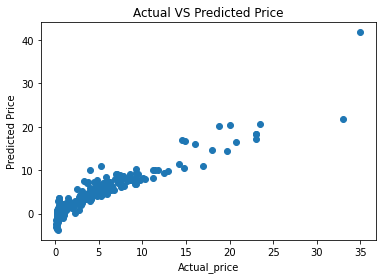

In [32]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual_price")
plt.ylabel("Predicted Price")
plt.title("Actual VS Predicted Price")
plt.show()

In [33]:
test_data_prediction=linear_regression_model.predict(X_test)

In [34]:
error_score=metrics.r2_score(Y_test,test_data_prediction)
print("R squared Error:",error_score)

R squared Error: 0.8365766715027051


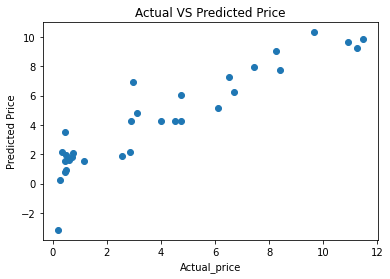

In [35]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual_price")
plt.ylabel("Predicted Price")
plt.title("Actual VS Predicted Price")
plt.show()

Lasso Regression

In [36]:
lasso_regression_model=Lasso()


In [37]:
lasso_regression_model.fit(X_train,Y_train)

Lasso()

Model Evaluation

In [38]:
training_data_prediction=lasso_regression_model.predict(X_train)

In [ ]:
error_score=metrics.r2_score(Y_train,training_data_prediction)
print("R squared Error:",error_score)

R squared Error: 0.8799451660493711


Visulaize the actual and predicted prices

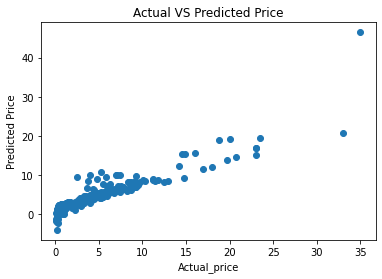

In [39]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual_price")
plt.ylabel("Predicted Price")
plt.title("Actual VS Predicted Price")
plt.show()

In [40]:
test_data_prediction=lasso_regression_model.predict(X_test)

In [41]:
error_score=metrics.r2_score(Y_test,test_data_prediction)
print("R squared Error:",error_score)

R squared Error: 0.8709167941173195


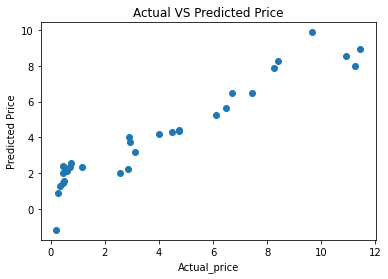

In [42]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual_price")
plt.ylabel("Predicted Price")
plt.title("Actual VS Predicted Price")
plt.show()

XGBoost Regressor model

In [44]:
from xgboost import XGBRegressor

In [45]:
XGB_regression_model=XGBRegressor()


In [46]:
XGB_regression_model.fit(X_train,Y_train)

[07:08:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

Model Evaluation

In [47]:
training_data_prediction=XGB_regression_model.predict(X_train)

In [48]:
error_score=metrics.r2_score(Y_train,training_data_prediction)
print("R squared Error:",error_score)

R squared Error: 0.9935328521090308


Visulaize the actual and predicted prices

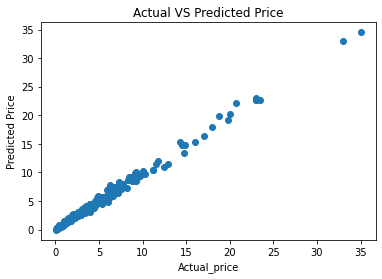

In [49]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual_price")
plt.ylabel("Predicted Price")
plt.title("Actual VS Predicted Price")
plt.show()

In [50]:
test_data_prediction=XGB_regression_model.predict(X_test)

In [51]:
error_score=metrics.r2_score(Y_test,test_data_prediction)
print("R squared Error:",error_score)

R squared Error: 0.9750166978147876


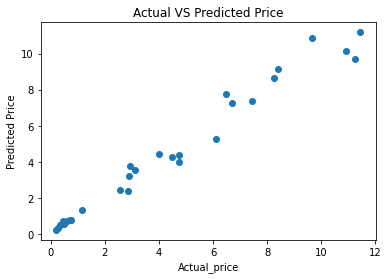

In [52]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual_price")
plt.ylabel("Predicted Price")
plt.title("Actual VS Predicted Price")
plt.show()

XGBoost Regressor gives better results compared to lasso and linear regression model.